In [3]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
%matplotlib notebook

In [16]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime.now()

In [17]:
df = web.DataReader('KO','yahoo',start,end)
df = df.drop(['Open','High','Low','Volume','Adj Close'],axis=1)

In [18]:
df['Closes1'] = df['Close'].shift(1)
df['Closes2'] = df['Close'].shift(2)

df['Closesb1'] = df['Close'].shift(-1)
df['Closesb2'] = df['Close'].shift(-2)

In [19]:
for day,i in df.iterrows():
    sf = i['Close']
    sf1 = i['Closes1']
    sf2 = i['Closes2']
    sfb1 = i['Closesb1']
    sfb2 = i['Closesb2']

    daybefore = day - datetime.timedelta(days=1)
    dayafter = day + datetime.timedelta(days=1)

    if sf>sf1 and sf>sfb1 and sf>sf2 and sf>sfb2:
        df.loc[day,'signal'] = 'sold'
        df.loc[daybefore,'signal'] = 'sold'
        df.loc[dayafter,'signal'] = 'sold'
    elif sf<sf1 and sf<sfb1 and sf<sf2 and sf<sfb2:
        df.loc[day,'signal'] = 'buy'
        df.loc[daybefore,'signal'] = 'buy'
        df.loc[dayafter,'signal'] = 'buy'
    
#     else:
#         df.loc[day,'signal'] = 'Wait and Hold'
   


In [20]:
df['signal'] = np.where(df['signal'].isnull() ,'Wait or Hold',df['signal'])
df['buy'] = np.where(df['signal'] == 'buy',df['Close'],np.nan)
df['sold'] = np.where(df['signal'] == 'sold',df['Close'],np.nan)

<IPython.core.display.Javascript object>


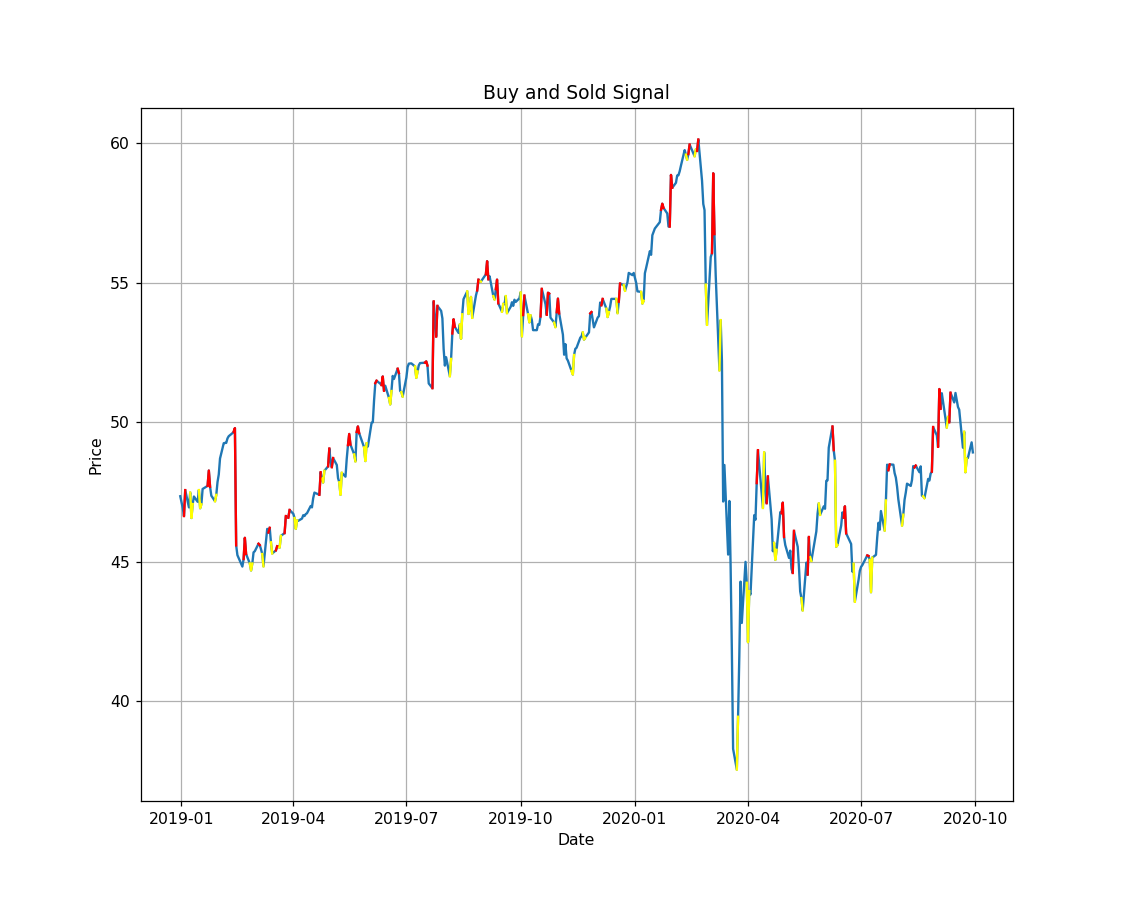

Text(0.5, 0, 'Date')

In [21]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Buy and Sold Signal')
plt.plot(df['Close'])
plt.plot(df['buy'],color='yellow')
plt.plot(df['sold'],color='red')
plt.ylabel('Price')
plt.xlabel('Date')